# Convolutional Neural Networks: Application

Welcome to Course 4's second assignment! In this notebook, you will:

- Create a mood classifer using the TF Keras Sequential API
- Build a ConvNet to identify sign language digits using the TF Keras Functional API

**After this assignment you will be able to:**

- Build and train a ConvNet in TensorFlow for a __binary__ classification problem
- Build and train a ConvNet in TensorFlow for a __multiclass__ classification problem
- Explain different use cases for the Sequential and Functional APIs

To complete this assignment, you should already be familiar with TensorFlow. If you are not, please refer back to the **TensorFlow Tutorial** of the third week of Course 2 ("**Improving deep neural networks**").

In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import scipy
from PIL import Image
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.python.framework import ops

%matplotlib inline
np.random.seed(1)

2023-12-08 09:43:07.379147: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-08 09:43:10.268876: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-08 09:43:10.306706: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-08 09:43:18.490532: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [5]:
!pip install pandas

In [9]:
def load_happy_dataset():
    
    train_dataset = h5py.File('datasets/train_happy.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('datasets/test_happy.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes


In [10]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_happy_dataset()


In [11]:
print(X_train_orig.shape)

(600, 64, 64, 3)


In [12]:
classes

array([0, 1])

In [13]:
# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

print(Y_train_orig.shape)

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print(Y_train.shape)

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

(1, 600)
(600, 1)
number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


In [14]:
X_train = X_train_orig / 255.
X_test = X_test_orig / 255.

print(X_train.shape)
print(Y_train_orig.shape)


# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T



(600, 64, 64, 3)
(1, 600)


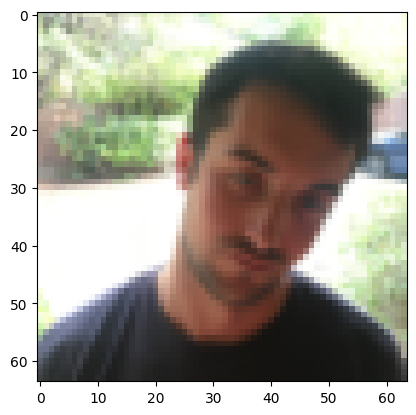

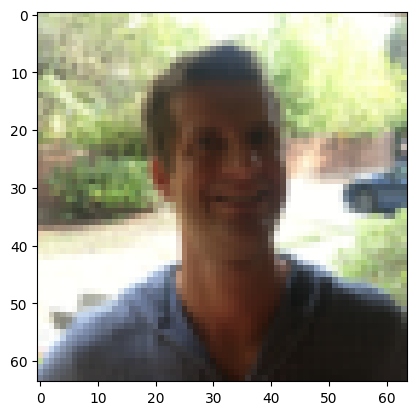

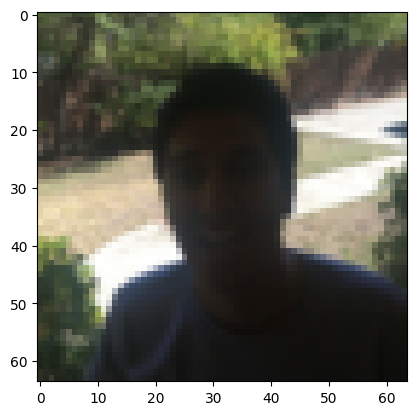

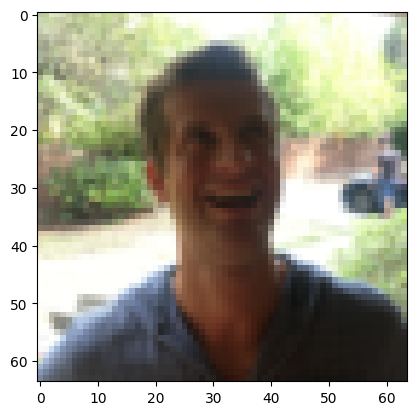

In [15]:
for i in range(4) :
    plt.imshow(X_train_orig[i])
    plt.show()

<a name='3-1'></a>
### 3.1 - Create the Sequential Model

As mentioned earlier, the TensorFlow Keras Sequential API can be used to build simple models with layer operations that proceed in a sequential order. 

You can also add layers incrementally to a Sequential model with the `.add()` method, or remove them using the `.pop()` method, much like you would in a regular Python list.

Actually, you can think of a Sequential model as behaving like a list of layers. Like Python lists, Sequential layers are ordered, and the order in which they are specified matters.  If your model is non-linear or contains layers with multiple inputs or outputs, a Sequential model wouldn't be the right choice!

For any layer construction in Keras, you'll need to specify the input shape in advance. This is because in Keras, the shape of the weights is based on the shape of the inputs. The weights are only created when the model first sees some input data. Sequential models can be created by passing a list of layers to the Sequential constructor, like you will do in the next assignment.

<a name='ex-1'></a>
### Exercise 1 - happyModel

Implement the `happyModel` function below to build the following model: `ZEROPAD2D -> CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> FLATTEN -> DENSE`. Take help from [tf.keras.layers](https://www.tensorflow.org/api_docs/python/tf/keras/layers) 

Also, plug in the following parameters for all the steps:

 - [ZeroPadding2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/ZeroPadding2D): padding 3, input shape 64 x 64 x 3
 - [Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D): Use 32 7x7 filters, stride 1
 - [BatchNormalization](https://www.tensorflow.org/api_docs/python/tf/keras/layers/BatchNormalization): for axis 3
 - [ReLU](https://www.tensorflow.org/api_docs/python/tf/keras/layers/ReLU)
 - [MaxPool2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D): Using default parameters
 - [Flatten](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten) the previous output.
 - Fully-connected ([Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense)) layer: Apply a fully connected layer with 1 neuron and a sigmoid activation. 
 
 
 **Hint:**
 
 Use **tfl** as shorthand for **tensorflow.keras.layers**

model.get_weights() : Retorna la lista de todos los pesos del tensor as Numpy array

model.set_weights(weights): sets the values of the weights of the model, from a list of Numpy arrays. The arrays in the list should have the same shape as those returned by get_weights().



1/1 [==============================] - 0s 424ms/step
[[37. 12. 72.  9. 75.  5. 79. 64.]
 [16.  1. 76. 71.  6. 25. 50. 20.]
 [18. 84. 11. 28. 29. 14. 50. 68.]
 [87. 87. 94. 96. 86. 13.  9.  7.]
 [63. 61. 22. 57.  1.  0. 60. 81.]
 [ 8. 88. 13. 47. 72. 30. 71.  3.]
 [70. 21. 49. 57.  3. 68. 24. 43.]
 [76. 26. 52. 80. 41. 82. 15. 64.]]
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. 37. 12. 72.  9. 75.  5. 79. 64.  0.]
 [ 0. 16.  1. 76. 71.  6. 25. 50. 20.  0.]
 [ 0. 18. 84. 11. 28. 29. 14. 50. 68.  0.]
 [ 0. 87. 87. 94. 96. 86. 13.  9.  7.  0.]
 [ 0. 63. 61. 22. 57.  1.  0. 60. 81.  0.]
 [ 0.  8. 88. 13. 47. 72. 30. 71.  3.  0.]
 [ 0. 70. 21. 49. 57.  3. 68. 24. 43.  0.]
 [ 0. 76. 26. 52. 80. 41. 82. 15. 64.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
[[ -19.  136.  -20.  488.  -64.  304.   85.  120.]
 [ -89.  118.  118. -159.  316. -167. -136.  389.]
 [ 231. -230.  174.  347.  258.   64.   83.   57.]
 [-253.  409.  209.  226.  106.  -52. -147.  344.]
 [-337.   17.   56. -187.  403.

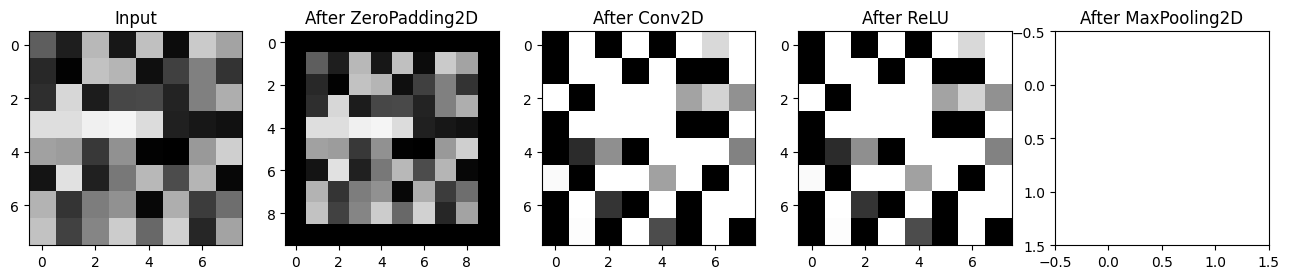

In [16]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow.keras.layers as tfl

# Crear una matriz de entrada de 8x8 con valores en el rango de 0 a 100
input_matrix = np.random.randint(0, 101, size=(8, 8)).astype(np.float32)

# Agregar una dimensión para representar el canal (en este caso, 1 canal ya que es una imagen en escala de grises)
input_matrix = np.expand_dims(input_matrix, axis=-1)

# Definir un kernel (filtro)
kernel = np.array([[1, 1, -4],
                   [2, -2, 2],
                   [1, 2, -1]], dtype=np.float32)

# Agregar una dimensión al kernel para representar el canal
kernel = np.expand_dims(kernel, axis=-1)

# Crear un modelo secuencial de TensorFlow con relleno, convolución, ReLU y MaxPooling
model = tf.keras.Sequential([
    tfl.ZeroPadding2D(padding=1, input_shape=(8, 8, 1)),
    tf.keras.layers.Conv2D(filters=1, kernel_size=(3, 3), use_bias=False),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(3, 3))
])

# Establecer los pesos del modelo con el kernel definido
model.layers[1].set_weights([kernel.reshape((3, 3, 1, 1))])

# Aplicar la convolución, ReLU y MaxPooling
output_matrix = model.predict(np.expand_dims(input_matrix, axis=0))

print("==================================================================================")
print(input_matrix[:, :, 0])


print("==================================================================================")
print(model.layers[0](np.expand_dims(input_matrix, axis=0)).numpy()[0, :, :, 0])

print("==================================================================================")
print(model.layers[1](model.layers[0](np.expand_dims(input_matrix, axis=0))).numpy()[0, :, :, 0])

print("==================================================================================")
print(model.layers[2](model.layers[1](model.layers[0](np.expand_dims(input_matrix, axis=0)))).numpy()[0, :, :, 0])

print("==================================================================================")
print(output_matrix[0, :, :, 0])

# Visualizar las matrices
plt.figure(figsize=(16, 4))
plt.subplot(1, 5, 1)
plt.imshow(input_matrix[:, :, 0], cmap='gray', interpolation='none', vmin=0, vmax=100)
plt.title('Input')

plt.subplot(1, 5, 2)
plt.imshow(model.layers[0](np.expand_dims(input_matrix, axis=0)).numpy()[0, :, :, 0], cmap='gray', interpolation='none', vmin=0, vmax=100)
plt.title('After ZeroPadding2D')

plt.subplot(1, 5, 3)
plt.imshow(model.layers[1](model.layers[0](np.expand_dims(input_matrix, axis=0))).numpy()[0, :, :, 0], cmap='gray', interpolation='none', vmin=0, vmax=100)
plt.title('After Conv2D')

plt.subplot(1, 5, 4)
plt.imshow(model.layers[2](model.layers[1](model.layers[0](np.expand_dims(input_matrix, axis=0)))).numpy()[0, :, :, 0], cmap='gray', interpolation='none', vmin=0, vmax=100)
plt.title('After ReLU')

plt.subplot(1, 5, 5)
plt.imshow(output_matrix[0, :, :, 0], cmap='gray', interpolation='none', vmin=0, vmax=100)
plt.title('After MaxPooling2D')

plt.show()


In [17]:

def happyModel():
    """
    Implements the forward propagation for the binary classification model:
    ZEROPAD2D -> CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> FLATTEN -> DENSE
    
    Note that for simplicity and grading purposes, you'll hard-code all the values
    such as the stride and kernel (filter) sizes. 
    Normally, functions should take these values as function parameters.
    
    Arguments:
    None

    Returns:
    model -- TF Keras model (object containing the information for the entire training process) 
    """
    model = tf.keras.Sequential([
            # This is the input the hight - weight - chanel
            tf.keras.Input(shape=(64 , 64 ,3)),
            ## ZeroPadding2D with padding 3, input shape of 64 x 64 x 3
            tfl.ZeroPadding2D(padding=3), # As import tensorflow.keras.layers as tfl
            ## Conv2D with 32 7x7 filters and stride of 1
            tfl.Conv2D(filters=32,kernel_size=7,strides=1),
            ## BatchNormalization for axis 3
            tfl.BatchNormalization(axis=3, momentum=0.99, epsilon=0.001),
            ## ReLU
            tfl.ReLU(),
            ## Max Pooling 2D with default parameters
            tfl.MaxPool2D(),
            ## Flatten layereee
            tfl.Flatten(),
            ## Dense layer with 1 unit for output & 'sigmoid' activation
            tfl.Dense(1,activation='sigmoid')
        ])
    
    return model

In [18]:
happy_model = happyModel()

In [19]:
happy_model.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])
                    

In [20]:
happy_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d_1 (ZeroPadd  (None, 70, 70, 3)         0         
 ing2D)                                                          
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4736      
                                                                 
 batch_normalization (Batch  (None, 64, 64, 32)        128       
 Normalization)                                                  
                                                                 
 re_lu (ReLU)                (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 32)        0         
 g2D)                                                            
                                                      

<a name='3-2'></a>
### 3.2 - Train and Evaluate the Model

After creating the model, compiling it with your choice of optimizer and loss function, and doing a sanity check on its contents, you are now ready to build! 

Simply call `.fit()` to train. That's it! No need for mini-batching, saving, or complex backpropagation computations. That's all been done for you, as you're using a TensorFlow dataset with the batches specified already. You do have the option to specify epoch number or minibatch size if you like (for example, in the case of an un-batched dataset).

In [21]:
happy_model.fit(X_train, Y_train, epochs=10, batch_size=16)

Epoch 1/10
38/38 [==============================] - 2s 43ms/step - loss: 0.4733 - accuracy: 0.7983
Epoch 2/10
38/38 [==============================] - 2s 41ms/step - loss: 0.1510 - accuracy: 0.9433
Epoch 3/10
38/38 [==============================] - 1s 38ms/step - loss: 0.1407 - accuracy: 0.9483
Epoch 4/10
38/38 [==============================] - 1s 36ms/step - loss: 0.0873 - accuracy: 0.9650
Epoch 5/10
38/38 [==============================] - 1s 34ms/step - loss: 0.1094 - accuracy: 0.9617
Epoch 6/10
38/38 [==============================] - 1s 34ms/step - loss: 0.0641 - accuracy: 0.9717
Epoch 7/10
38/38 [==============================] - 1s 36ms/step - loss: 0.0898 - accuracy: 0.9583
Epoch 8/10
38/38 [==============================] - 1s 37ms/step - loss: 0.1126 - accuracy: 0.9583
Epoch 9/10
38/38 [==============================] - 2s 40ms/step - loss: 0.0991 - accuracy: 0.9650
Epoch 10/10
38/38 [==============================] - 1s 36ms/step - loss: 0.1899 - accuracy: 0.9317


After that completes, just use `.evaluate()` to evaluate against your test set. This function will print the value of the loss function and the performance metrics specified during the compilation of the model. In this case, the `binary_crossentropy` and the `accuracy` respectively.

In [22]:
happy_model.evaluate(X_test, Y_test)

5/5 [==============================] - 0s 18ms/step - loss: 0.8587 - accuracy: 0.7000


[0.8587042093276978, 0.699999988079071]

Easy, right ? But what if you need to build a model with shared layers, branches, or multiple inputs and outputs? 

Next up : Enter the Functional API, you slightly more complex, highly flexible friend.

## The Functional API 

Welcome to the second half of the assignment, where you'll use Keras'flexible [Functional API](https://www.tensorflow.org/guide/keras/functional) to build ConvNet that can differentiate between 6 sign language digits. 

Imagine that, where the Sequential API requires the model to move in a linear fashion through its layers, the Functional API allows much more flexibility.
**Where Sequential is a straight line, a Functional model is a graph, where the nodes of the layers can connect in many more ways that one.**

In [30]:
def load_signs_dataset():
    
    train_dataset = h5py.File('datasets/train_signs.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('datasets/test_signs.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes


In [31]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_signs_dataset()

In [32]:
print(X_train_orig.shape)
print(Y_train_orig.shape)
print(classes)

(1080, 64, 64, 3)
(1, 1080)
[0 1 2 3 4 5]


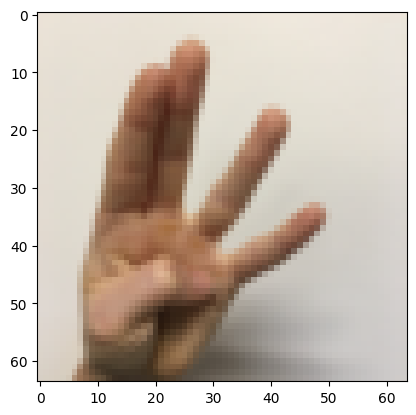

In [33]:
index = 9
plt.imshow(X_train_orig[index])

In [34]:
def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)].T
    return Y


In [36]:
X_train = X_train_orig/255.
X_test = X_test_orig/255.

Y_train = convert_to_one_hot(Y_train_orig, 6).T
Y_test = convert_to_one_hot(Y_test_orig, 6).T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))


number of training examples = 1080
number of test examples = 120
X_train shape: (1080, 64, 64, 3)
Y_train shape: (1080, 6)
X_test shape: (120, 64, 64, 3)
Y_test shape: (120, 6)


Begin building your graph of layers by creating an input node that functions as a callable object:

- **input_img = tf.keras.Input(shape=input_shape):** 

Then, create a new node in the graph of layers by calling a layer on the `input_img` object: 
<a name='ex-2'></a>
### Exercise 2 - convolutional_model

Implement the `convolutional_model` function below to build the following model: `CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> DENSE`. Use the functions above! 

Also, plug in the following parameters for all the steps:

 - [Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D): Use 8 4 by 4 filters, stride 1, padding is "SAME"
 - [ReLU](https://www.tensorflow.org/api_docs/python/tf/keras/layers/ReLU)
 - [MaxPool2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D): Use an 8 by 8 filter size and an 8 by 8 stride, padding is "SAME"
 - **Conv2D**: Use 16 2 by 2 filters, stride 1, padding is "SAME"
 - **ReLU**
 - **MaxPool2D**: Use a 4 by 4 filter size and a 4 by 4 stride, padding is "SAME"
 - [Flatten](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten) the previous output.
 - Fully-connected ([Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense)) layer: Apply a fully connected layer with 6 neurons and a softmax activation. 



<a name='ex-2'></a>
### Exercise 2 - convolutional_model

Implement the `convolutional_model` function below to build the following model: `CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> DENSE`. Use the functions above! 

Also, plug in the following parameters for all the steps:

 - [Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D): Use 8 4 by 4 filters, stride 1, padding is "SAME"
 - [ReLU](https://www.tensorflow.org/api_docs/python/tf/keras/layers/ReLU)
 - [MaxPool2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D): Use an 8 by 8 filter size and an 8 by 8 stride, padding is "SAME"
 - **Conv2D**: Use 16 2 by 2 filters, stride 1, padding is "SAME"
 - **ReLU**
 - **MaxPool2D**: Use a 4 by 4 filter size and a 4 by 4 stride, padding is "SAME"
 - [Flatten](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten) the previous output.
 - Fully-connected ([Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense)) layer: Apply a fully connected layer with 6 neurons and a softmax activation. 

In [39]:
# GRADED FUNCTION: convolutional_model

def convolutional_model(input_shape):
    """
    Implements the forward propagation for the model:
    CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> DENSE
    
    Note that for simplicity and grading purposes, you'll hard-code some values
    such as the stride and kernel (filter) sizes. 
    Normally, functions should take these values as function parameters.
    
    Arguments:
    input_img -- input dataset, of shape (input_shape)

    Returns:
    model -- TF Keras model (object containing the information for the entire training process) 
    """

    input_img = tf.keras.Input(shape=input_shape)
    ## CONV2D: 8 filters 4x4, stride of 1, padding 'SAME'
    Z1 = tfl.Conv2D(filters= 8. , kernel_size=4 , padding='same',strides=1)(input_img)
    ## RELU
    A1 = tfl.ReLU()(Z1)
    ## MAXPOOL: window 8x8, stride 8, padding 'SAME'
    P1 = tfl.MaxPool2D(pool_size=8, strides=8, padding='SAME')(A1)
    ## CONV2D: 16 filters 2x2, stride 1, padding 'SAME'
    Z2 = tfl.Conv2D(filters= 16. , kernel_size=2 , padding='same',strides=1)(P1)
    ## RELU
    A2 =  tfl.ReLU()(Z2)
    ## MAXPOOL: window 4x4, stride 4, padding 'SAME'
    P2 = tfl.MaxPool2D(pool_size=4, strides=4, padding='SAME')(A2)
    ## FLATTEN
    F = tfl.Flatten()(P2)
    ## Dense layer
    ## 6 neurons in output layer. Hint: one of the arguments should be "activation='softmax'" 
    outputs = tfl.Dense(units= 6 , activation='softmax')(F)
    model = tf.keras.Model(inputs=input_img, outputs=outputs)
    return model

In [42]:
conv_model = convolutional_model((64, 64, 3))
conv_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
conv_model.summary()


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 64, 64, 8)         392       
                                                                 
 re_lu_5 (ReLU)              (None, 64, 64, 8)         0         
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 8, 8, 8)           0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 8, 8, 16)          528       
                                                                 
 re_lu_6 (ReLU)              (None, 8, 8, 16)          0         
                                                           

In [43]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train)).batch(64)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, Y_test)).batch(64)
history = conv_model.fit(train_dataset, epochs=100, validation_data=test_dataset)

Epoch 1/100


2023-12-08 10:13:46.689848: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 106168320 exceeds 10% of free system memory.
2023-12-08 10:13:46.835442: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 106168320 exceeds 10% of free system memory.


17/17 [==============================] - 1s 33ms/step - loss: 1.8239 - accuracy: 0.1694 - val_loss: 1.7942 - val_accuracy: 0.1667
Epoch 2/100
17/17 [==============================] - 0s 28ms/step - loss: 1.7930 - accuracy: 0.1648 - val_loss: 1.7877 - val_accuracy: 0.1833
Epoch 3/100
17/17 [==============================] - 0s 28ms/step - loss: 1.7887 - accuracy: 0.2157 - val_loss: 1.7860 - val_accuracy: 0.3167
Epoch 4/100
17/17 [==============================] - 0s 29ms/step - loss: 1.7859 - accuracy: 0.2565 - val_loss: 1.7838 - val_accuracy: 0.2833
Epoch 5/100
17/17 [==============================] - 1s 32ms/step - loss: 1.7802 - accuracy: 0.2787 - val_loss: 1.7783 - val_accuracy: 0.3333
Epoch 6/100
17/17 [==============================] - 1s 29ms/step - loss: 1.7711 - accuracy: 0.3065 - val_loss: 1.7705 - val_accuracy: 0.3250
Epoch 7/100
17/17 [==============================] - 1s 30ms/step - loss: 1.7597 - accuracy: 0.3009 - val_loss: 1.7608 - val_accuracy: 0.3167
Epoch 8/100
17/17 

In [66]:
def predict_image(index) :
    input_example = np.expand_dims(X_train[index], axis=0)
    # Realizar la predicción
    prediction = conv_model.predict(input_example)
    # Obtener el índice de la clase con la probabilidad más alta
    predicted_class_index = np.argmax(prediction)
    print("El numero es :" ,predicted_class_index)
    plt.imshow(X_train[index])
    plt.show()


1/1 [==============================] - 0s 23ms/step
El numero es : 4


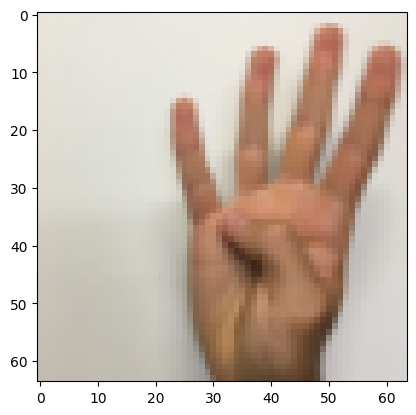

1/1 [==============================] - 0s 14ms/step
El numero es : 5


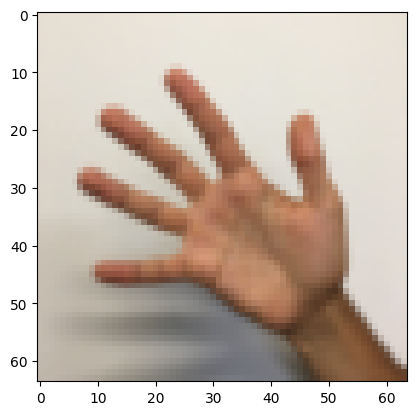

1/1 [==============================] - 0s 14ms/step
El numero es : 0


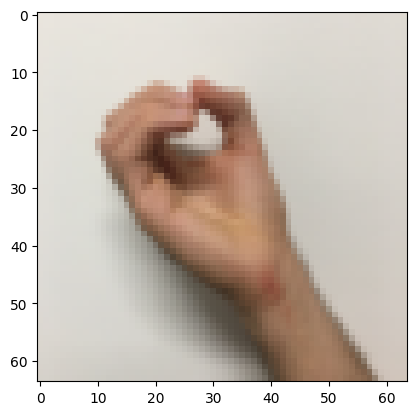

1/1 [==============================] - 0s 14ms/step
El numero es : 3


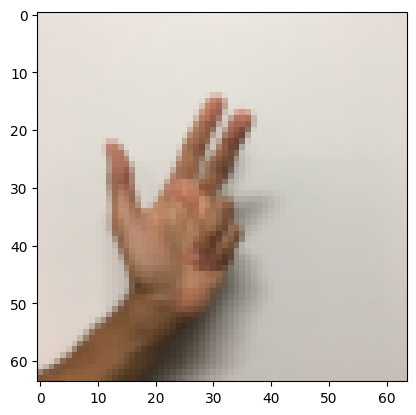

1/1 [==============================] - 0s 13ms/step
El numero es : 1


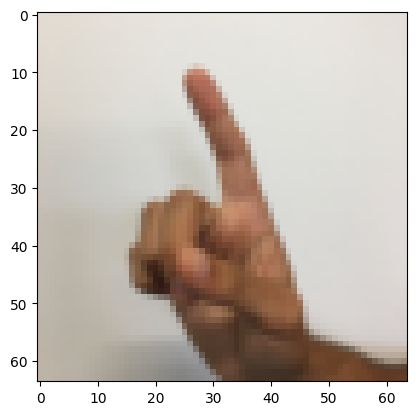

1/1 [==============================] - 0s 15ms/step
El numero es : 5


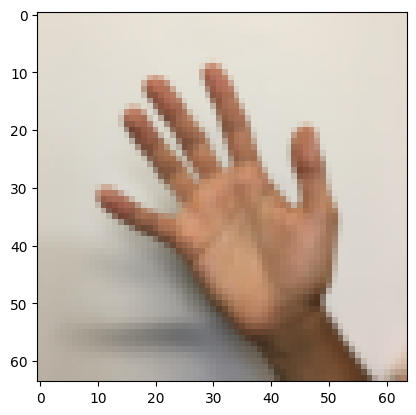

1/1 [==============================] - 0s 13ms/step
El numero es : 4


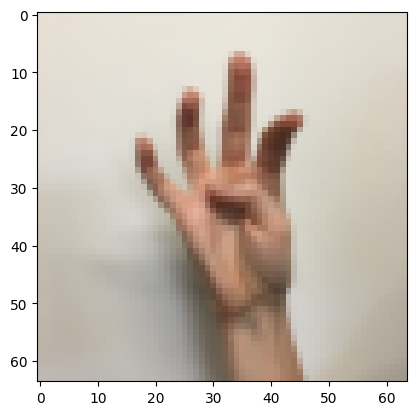

1/1 [==============================] - 0s 15ms/step
El numero es : 4


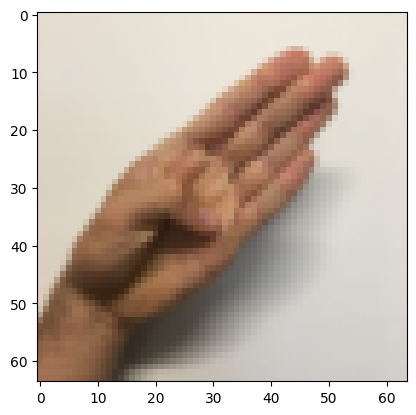

1/1 [==============================] - 0s 14ms/step
El numero es : 0


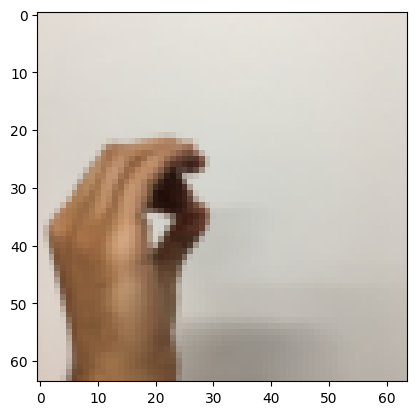

1/1 [==============================] - 0s 12ms/step
El numero es : 4


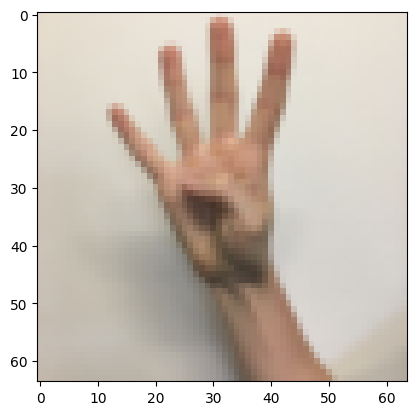

1/1 [==============================] - 0s 14ms/step
El numero es : 2


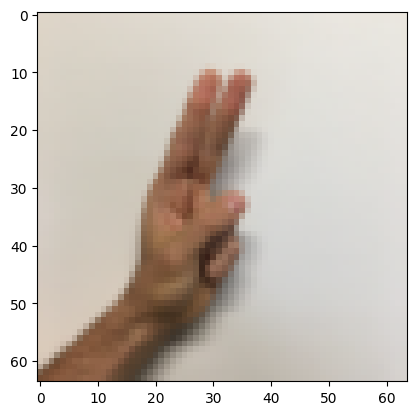

1/1 [==============================] - 0s 13ms/step
El numero es : 0


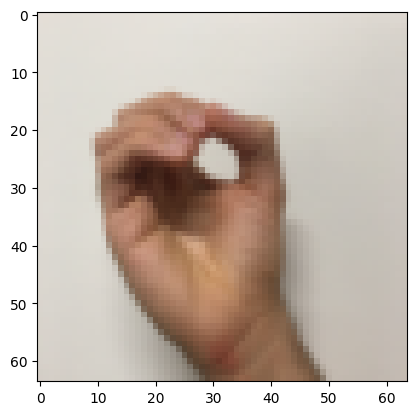

1/1 [==============================] - 0s 13ms/step
El numero es : 4


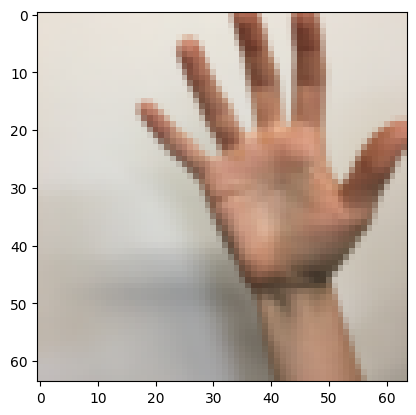

1/1 [==============================] - 0s 14ms/step
El numero es : 0


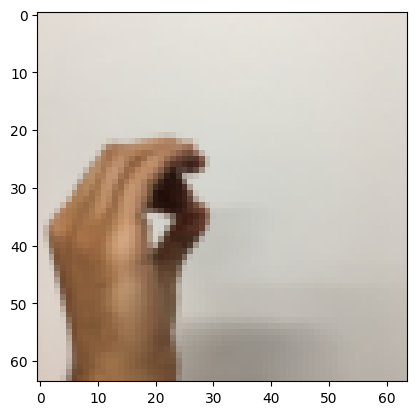

1/1 [==============================] - 0s 12ms/step
El numero es : 4


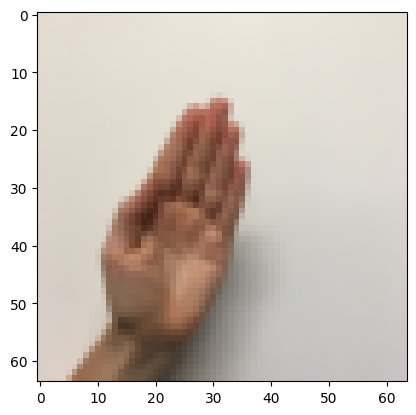

1/1 [==============================] - 0s 13ms/step
El numero es : 5


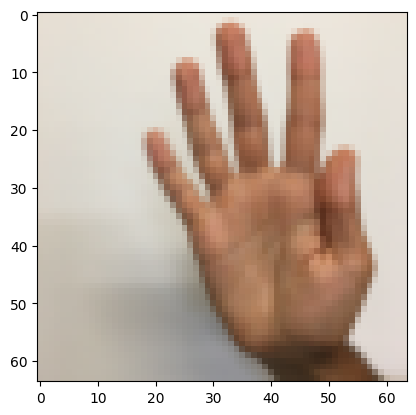

1/1 [==============================] - 0s 13ms/step
El numero es : 2


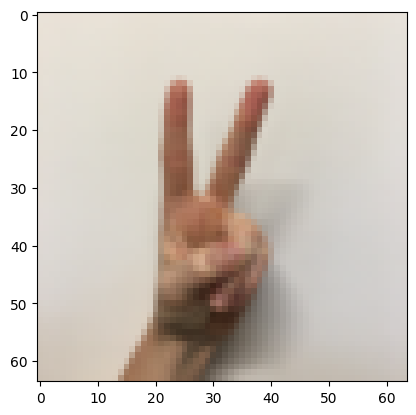

1/1 [==============================] - 0s 13ms/step
El numero es : 4


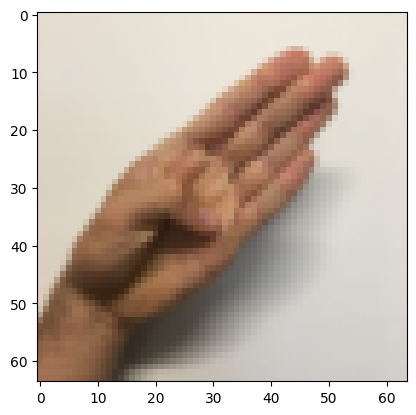

1/1 [==============================] - 0s 15ms/step
El numero es : 0


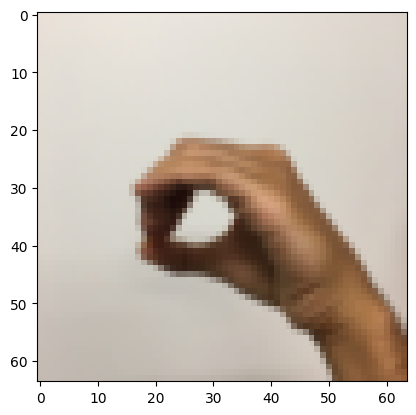

1/1 [==============================] - 0s 13ms/step
El numero es : 3


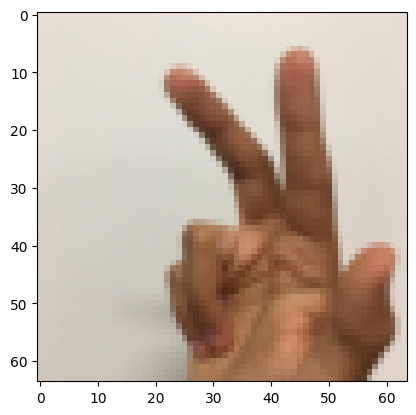

In [67]:
test = np.random.randint(0, 500, size=( 20))

for i in test:
    predict_image(i)


/tmp/ipykernel_6200/973814028.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
/tmp/ipykernel_6200/973814028.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)


[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Accuracy')]

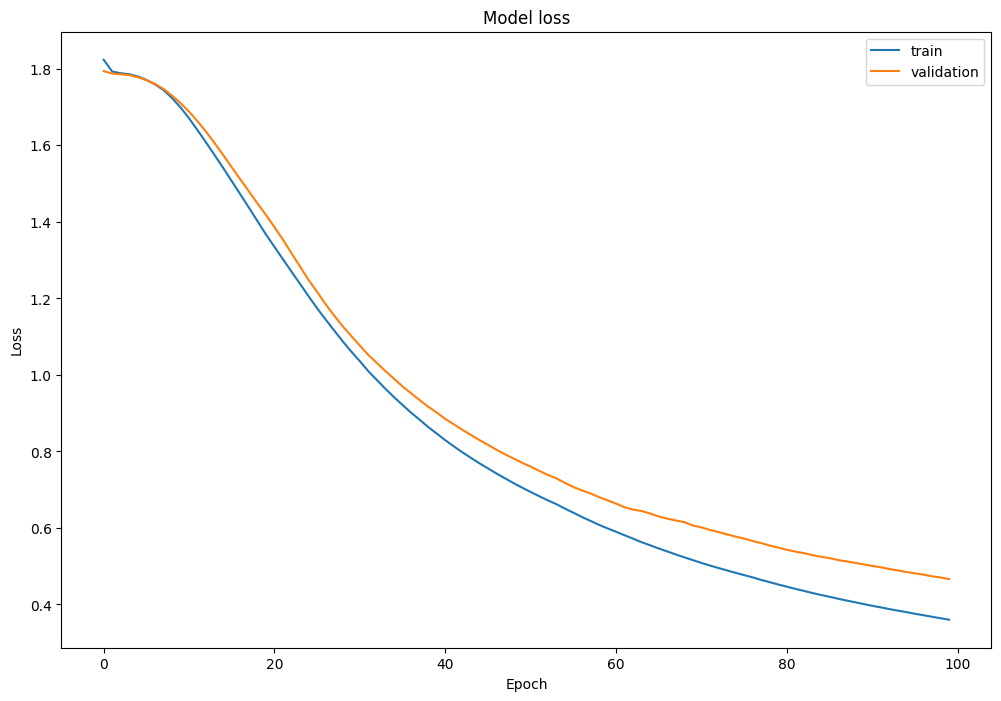

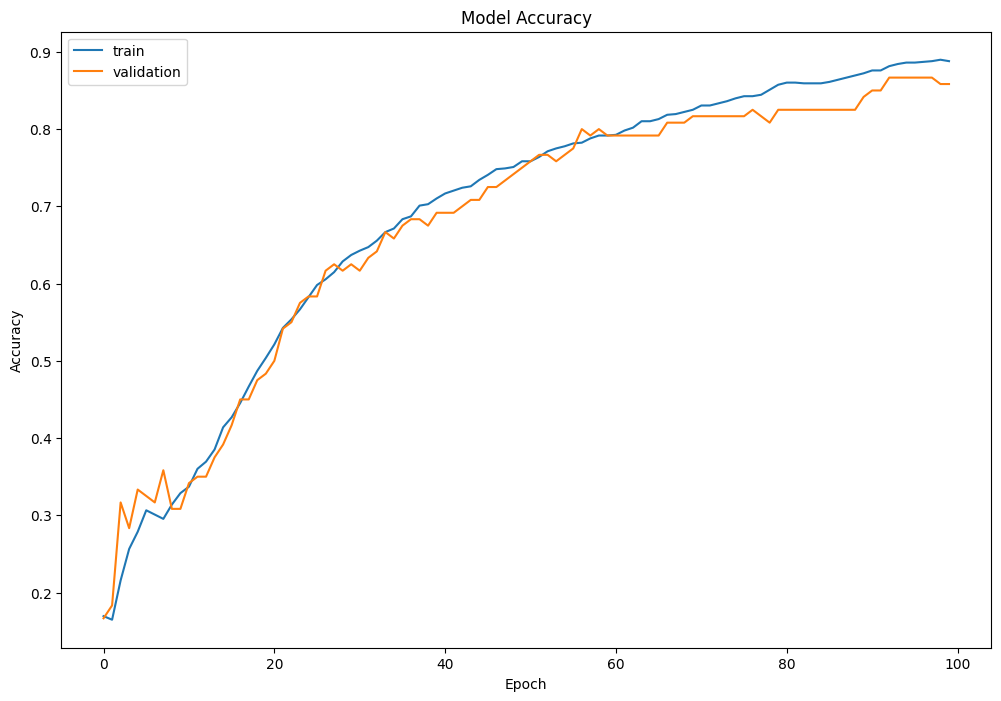

In [69]:
# The history.history["loss"] entry is a dictionary with as many values as epochs that the
# model was trained on. 
df_loss_acc = pd.DataFrame(history.history)
df_loss= df_loss_acc[['loss','val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_acc= df_loss_acc[['accuracy','val_accuracy']]
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)
df_loss.plot(title='Model loss',figsize=(12,8)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(12,8)).set(xlabel='Epoch',ylabel='Accuracy')